In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import norm


In [2]:
#dataset = pd.read_csv('/kaggle/input/milkquality/milknew.csv')
dataset = pd.read_csv('milknew.csv')

In [3]:
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
#checking if there is any null values
dataset.isnull().count()

pH            1059
Temprature    1059
Taste         1059
Odor          1059
Fat           1059
Turbidity     1059
Colour        1059
Grade         1059
dtype: int64

In [5]:
#Encode Labels
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Grade'] = encoder.fit_transform(dataset['Grade'])
dataset

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [6]:
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,1.111426
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.763568
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


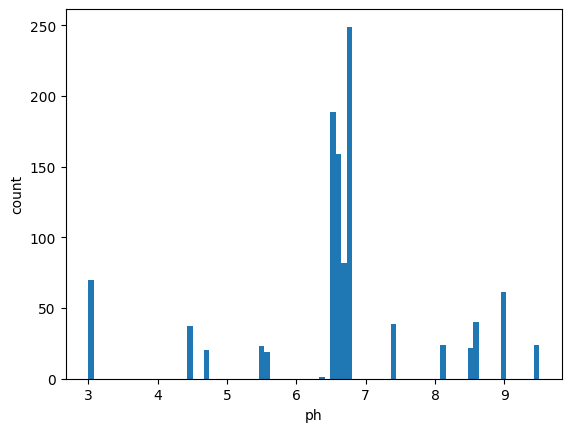

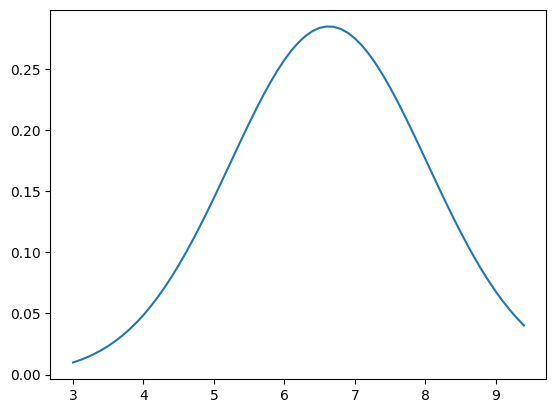

In [7]:
#number of data points is 7420 
#number of bins should be sqr of number of data points, then it will be 82
#PH
plt.hist(dataset.pH,bins=82,rwidth=4)
plt.xlabel('ph')
plt.ylabel('count')
plt.show()
rng=np.arange(dataset.pH.min(),dataset.pH.max(),0.1)
plt.plot(rng,norm.pdf(rng,dataset.pH.mean(),dataset.pH.std()))


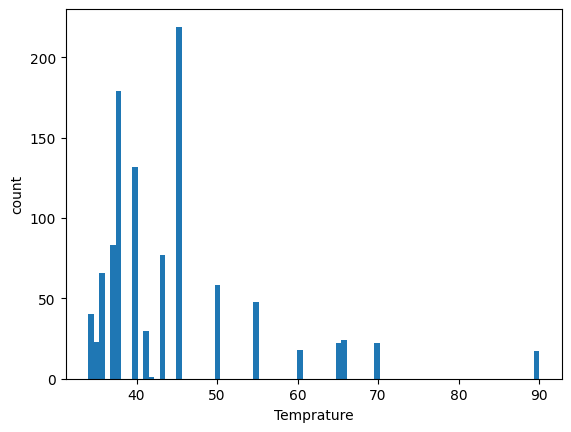

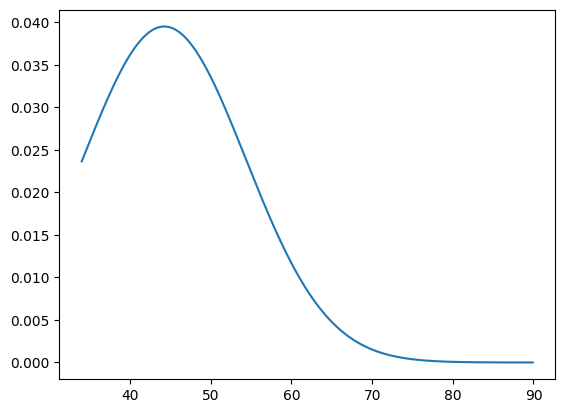

In [8]:
#Temprature
plt.hist(dataset.Temprature,bins=82,rwidth=4)
plt.xlabel('Temprature')
plt.ylabel('count')
plt.show()
rng=np.arange(dataset.Temprature.min(),dataset.Temprature.max(),0.1)
plt.plot(rng,norm.pdf(rng,dataset.Temprature.mean(),dataset.Temprature.std()))

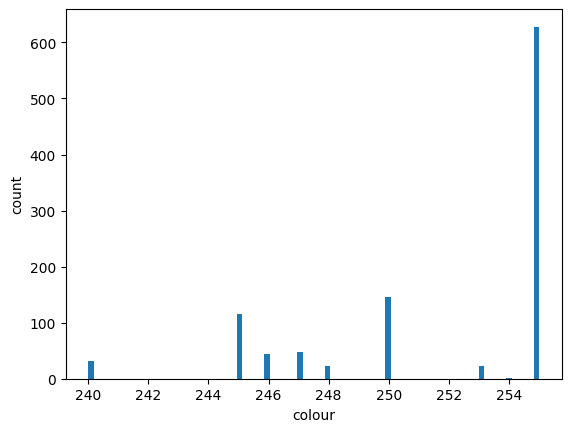

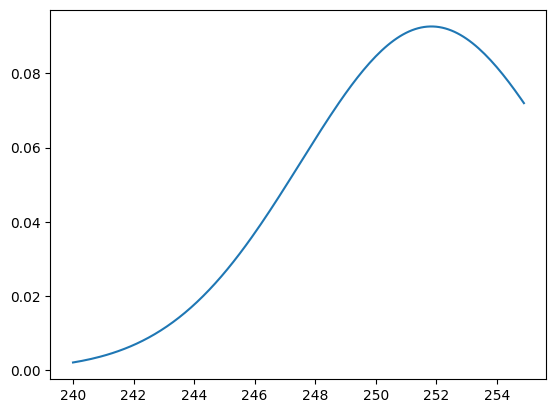

In [9]:
#Colour
plt.hist(dataset.Colour,bins=82,rwidth=4)
plt.xlabel('colour')
plt.ylabel('count')
plt.show()
rng=np.arange(dataset.Colour.min(),dataset.Colour.max(),0.1)
plt.plot(rng,norm.pdf(rng,dataset.Colour.mean(),dataset.Colour.std()))

In [10]:
#To display the data and identify outliers
def plot_boxplot(dataset,ft):
    dataset.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

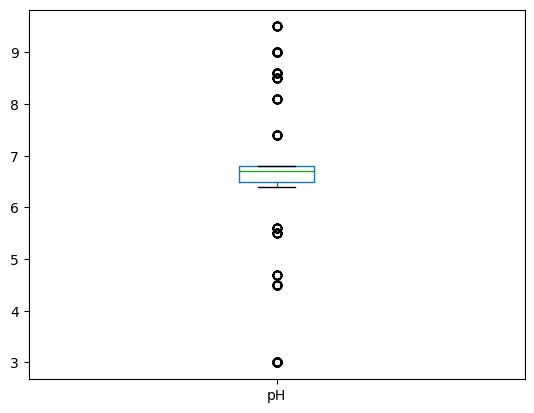

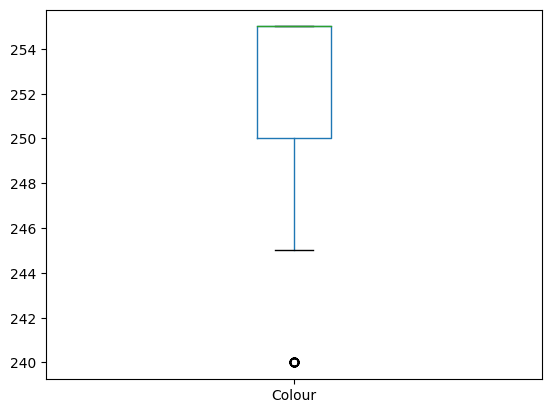

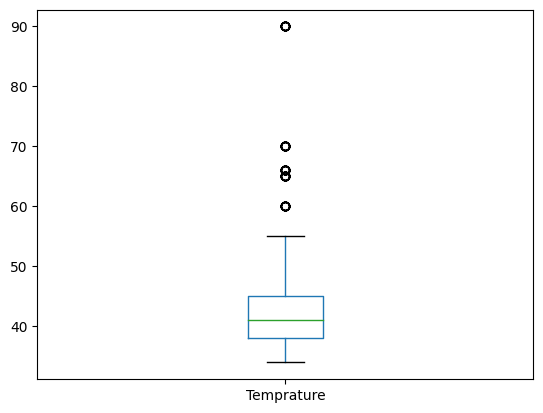

In [11]:
plot_boxplot(dataset,'pH')
plot_boxplot(dataset,'Colour')
plot_boxplot(dataset,'Temprature')

In [12]:
#To extract outliers using IQR
def outlier_extract(dataset, df):
    Q1=dataset[df].quantile(0.25)
    Q3=dataset[df].quantile(0.75)
    IQR=Q3-Q1
    lowerlimit= Q1 - 1.5 * IQR
    upperlimit=Q3 + 1.5 * IQR
    dataset_outlier=dataset.index[(dataset[df]<lowerlimit )|(dataset[df]>upperlimit)]
    return dataset_outlier
#To remove this outliers
def remove(dataset,dataset_outlier):
    dataset_outlier=sorted(set(dataset_outlier))
    dataset=dataset.drop(dataset_outlier)
    return dataset
#To pass columns to outlier_extract function
index_list=[]
for feature in ['pH','Temprature','Colour']:
    index_list.extend(outlier_extract(dataset, feature))
dataset_cleand=remove(dataset,index_list)
dataset_cleand.count()
dataset= dataset_cleand

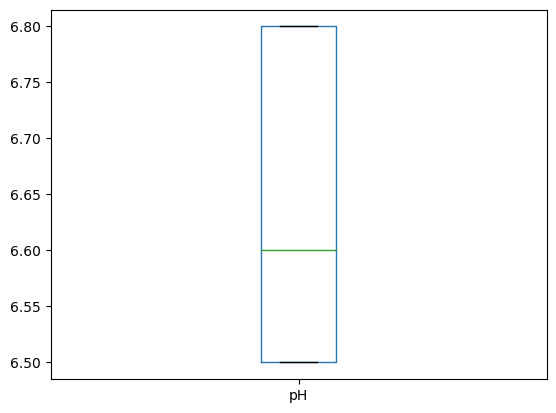

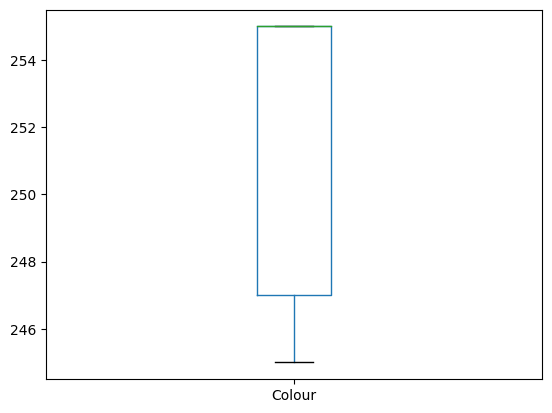

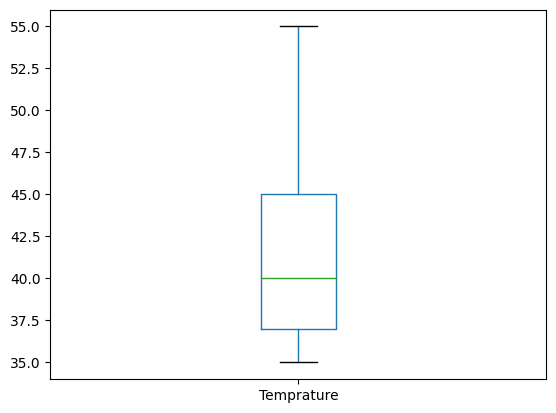

In [13]:
#After removing outliers
plot_boxplot(dataset_cleand,'pH')
plot_boxplot(dataset_cleand,'Colour')
plot_boxplot(dataset_cleand,'Temprature')

In [14]:
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,6.651080,40.898148,0.523148,0.381173,0.652778,0.327160,251.740741,1.132716
std,0.122942,4.446710,0.499850,0.486050,0.476455,0.469539,4.167002,0.952169
min,6.500000,35.000000,0.000000,0.000000,0.000000,0.000000,245.000000,0.000000
25%,6.500000,37.000000,0.000000,0.000000,0.000000,0.000000,247.000000,0.000000
50%,6.600000,40.000000,1.000000,0.000000,1.000000,0.000000,255.000000,2.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,6.800000,55.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [15]:
## Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['pH','Temprature','Colour']] = scaler.fit_transform(dataset[['pH','Temprature','Colour']])
dataset

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,-0.415803,-1.327432,1,0,1,0,0.542597,0
1,-0.415803,-1.102373,0,1,0,1,0.302431,0
4,-0.415803,-0.877314,0,0,0,0,0.782764,2
5,-0.415803,-0.877314,1,1,1,1,0.782764,0
9,0.398216,0.923159,1,1,0,0,-1.138565,2
...,...,...,...,...,...,...,...,...
1050,-0.415803,-0.877314,1,1,1,1,0.782764,0
1052,-1.229823,-0.202136,1,0,0,0,-0.418067,2
1054,0.398216,0.923159,1,1,0,0,-1.138565,2
1055,0.398216,-0.652255,1,0,1,0,0.782764,0


In [16]:
X ,X_test , y  , y_test = train_test_split(dataset.iloc[:,:6],dataset['Grade'],random_state=42,test_size=0.1)
X_train, X_val, y_train,y_val =train_test_split(X,y,random_state=42,test_size=0.2)
print("Training examples", X_train.shape[0])
print("Validation examples", X_val.shape[0])
print("Testing examples", X_test.shape[0])

Training examples 466
Validation examples 117
Testing examples 65


In [17]:
# Logistics
model = LogisticRegression()
# model = OneVsRestClassifier(model)
model.fit(X_train, y_train)
print("training Accuracy", model.score(X_train, y_train))
print("Validation Accuracy", model.score(X_val, y_val))
print("Testing Accuracy", model.score(X_val, y_val))

training Accuracy 0.8884120171673819
Validation Accuracy 0.8547008547008547
Testing Accuracy 0.8547008547008547


In [18]:
# SVM
model = SVC()
model.fit(X_train, y_train)
print("training Accuracy", model.score(X_train, y_train))
print("Validation Accuracy", model.score(X_val, y_val))
print("Testing Accuracy", model.score(X_test, y_test))

training Accuracy 0.9871244635193133
Validation Accuracy 0.9743589743589743
Testing Accuracy 0.9538461538461539


In [19]:
from sklearn.model_selection import GridSearchCV

def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
    _, ax = plt.subplots(1,1)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
    ax.set_title("Grid Search Scores")
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('CV Average Score')
    ax.legend(loc="best")
    ax.grid('on')


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.785 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.553 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

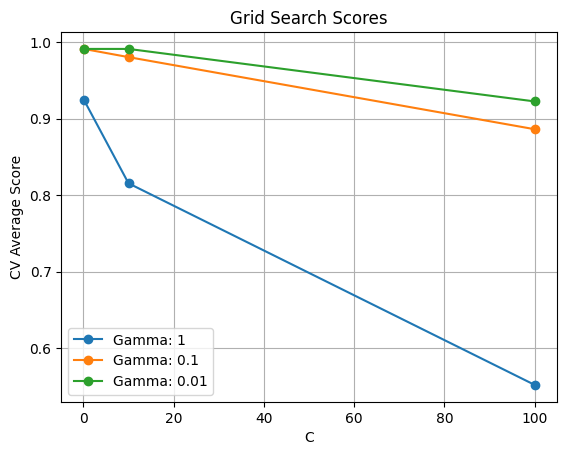

In [20]:
# Cross Validation and Hyper Parameter Optimization For SVM
# defining parameter range
param_grid = {'C': [0.1, 10, 100 ], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)
# Plotting 
plot_grid_search(grid.cv_results_, param_grid['C'], param_grid['gamma'], 'C', 'Gamma')

In [21]:
# Best Param SVM
print("Best Parameters", grid.best_params_)
print("training Accuracy", grid.score(X_train, y_train))
print("Validation Accuracy", grid.score(X_val, y_val))
print("Testing Accuracy", grid.score(X_test, y_test))

Best Parameters {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
training Accuracy 1.0
Validation Accuracy 1.0
Testing Accuracy 1.0


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...........C=0.1, solver=newton-cg;, score=0.883 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.860 total time=   0.0s
[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 4/5] END ...........C=0.1, solver=newton-cg;, score=0.882 total time=   0.0s
[CV 5/5] END ...........C=0.1, solver=newton-cg;, score=0.871 total time=   0.0s
[CV 1/5] END ...............C=0.1, solver=lbfgs;, score=0.883 total time=   0.0s
[CV 2/5] END ...............C=0.1, solver=lbfgs;, score=0.860 total time=   0.0s
[CV 3/5] END ...............C=0.1, solver=lbfgs;, score=0.817 total time=   0.0s
[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.882 total time=   0.0s
[CV 5/5] END ...............C=0.1, solver=lbfgs;, score=0.871 total time=   0.0s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.894 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear;,

/mnt/media/Adora/Development/selected1 /venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/media/Adora/Development/selected1 /venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

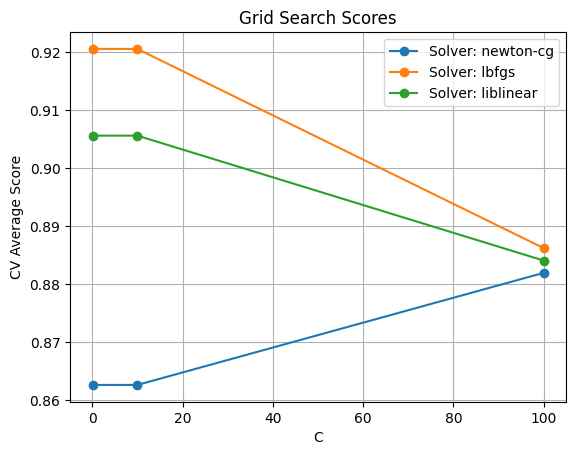

In [22]:
# Cross Validation and Hyper Parameter Optimization For Logistic
# defining parameter range
param_grid = {'C': [0.1, 10, 100 ],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear']
              } 
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)
# Plotting 
plot_grid_search(grid.cv_results_, param_grid['C'],param_grid['solver'], 'C','Solver')

In [23]:
# Best Param Logistic Regression
print("Best Parameters", grid.best_params_)
print("training Accuracy", grid.score(X_train, y_train))
print("Validation Accuracy", grid.score(X_val, y_val))
print("Testing Accuracy", grid.score(X_test, y_test))

Best Parameters {'C': 10, 'solver': 'newton-cg'}
training Accuracy 0.9184549356223176
Validation Accuracy 0.8888888888888888
Testing Accuracy 0.9076923076923077


In [24]:
# Testing the Final Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       1.00      1.00      1.00         7
           2       0.97      0.94      0.95        31

    accuracy                           0.95        65
   macro avg       0.97      0.97      0.97        65
weighted avg       0.95      0.95      0.95        65



In [25]:
print(confusion_matrix(y_test, y_pred))

[[26  0  1]
 [ 0  7  0]
 [ 2  0 29]]


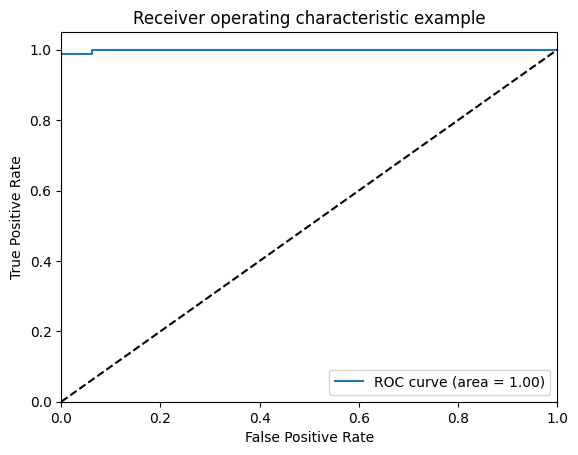

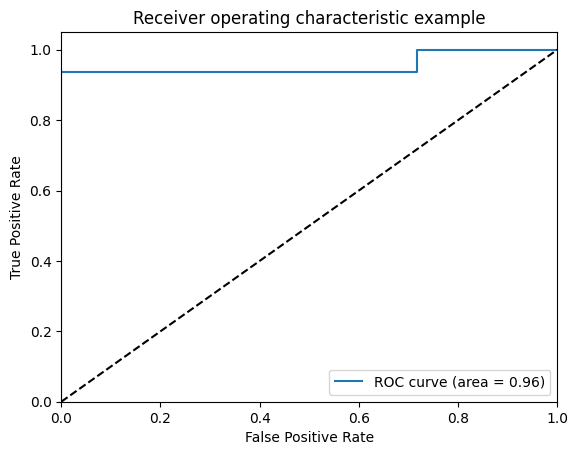

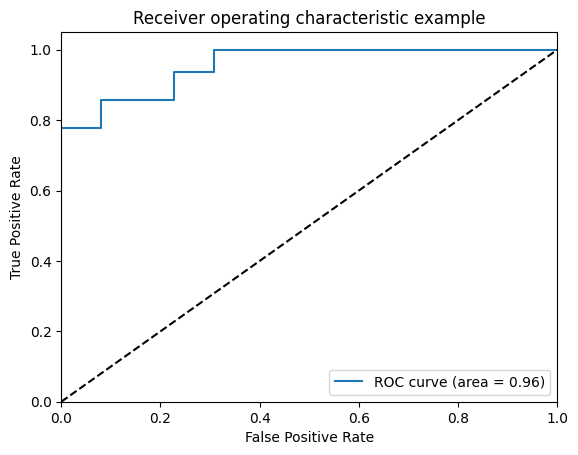

In [26]:
# ROC Curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
y=dataset['Grade']
X=dataset.iloc[:,:-1]
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LogisticRegression(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(model.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()